In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import mahotas as mh

In [4]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [5]:
z = 640
img = '000000_000000_000'+str(z)+'_000000.tif'

In [6]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

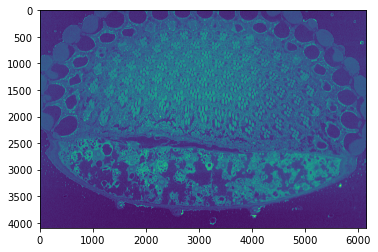

In [7]:
imshow(z_img)

In [8]:
z_img_cropped = z_img.copy()[1500:2000, 2500:4000]

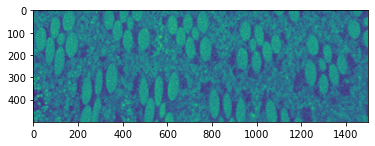

In [9]:
imshow(z_img_cropped)

In [10]:
# load ten images
slices = []
for z in range(640,650):
    img = '000000_000000_000'+str(z)+'_000000.tif'
    z_img = mh.imread(os.path.join(DATA_DIR,img))
    z_img_cropped = z_img[1500:2000, 2500:4000].astype(np.float)
    z_img_cropped /= z_img_cropped.max()
    z_img_cropped *= 255
    slices.append(z_img_cropped)

<Figure size 432x288 with 0 Axes>

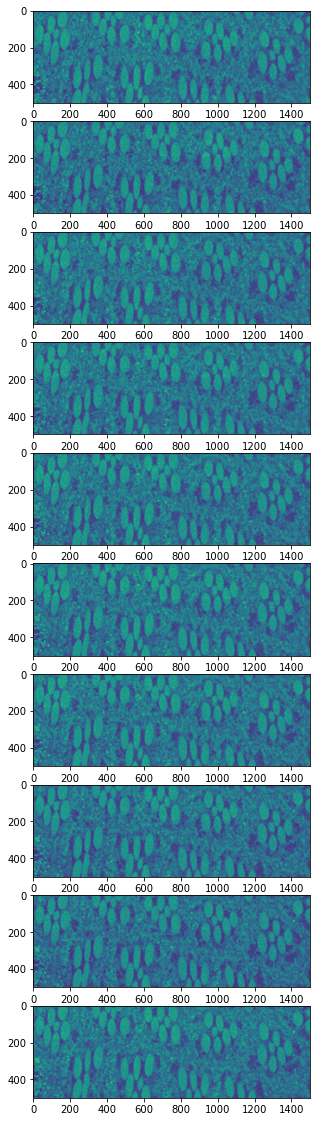

In [11]:
plt.figure()
f, axarr = plt.subplots(10, 1, figsize=(10, 20))
i = 0
for s in slices:
    # show images
    axarr[i].imshow(s)    
    i += 1

<Figure size 432x288 with 0 Axes>

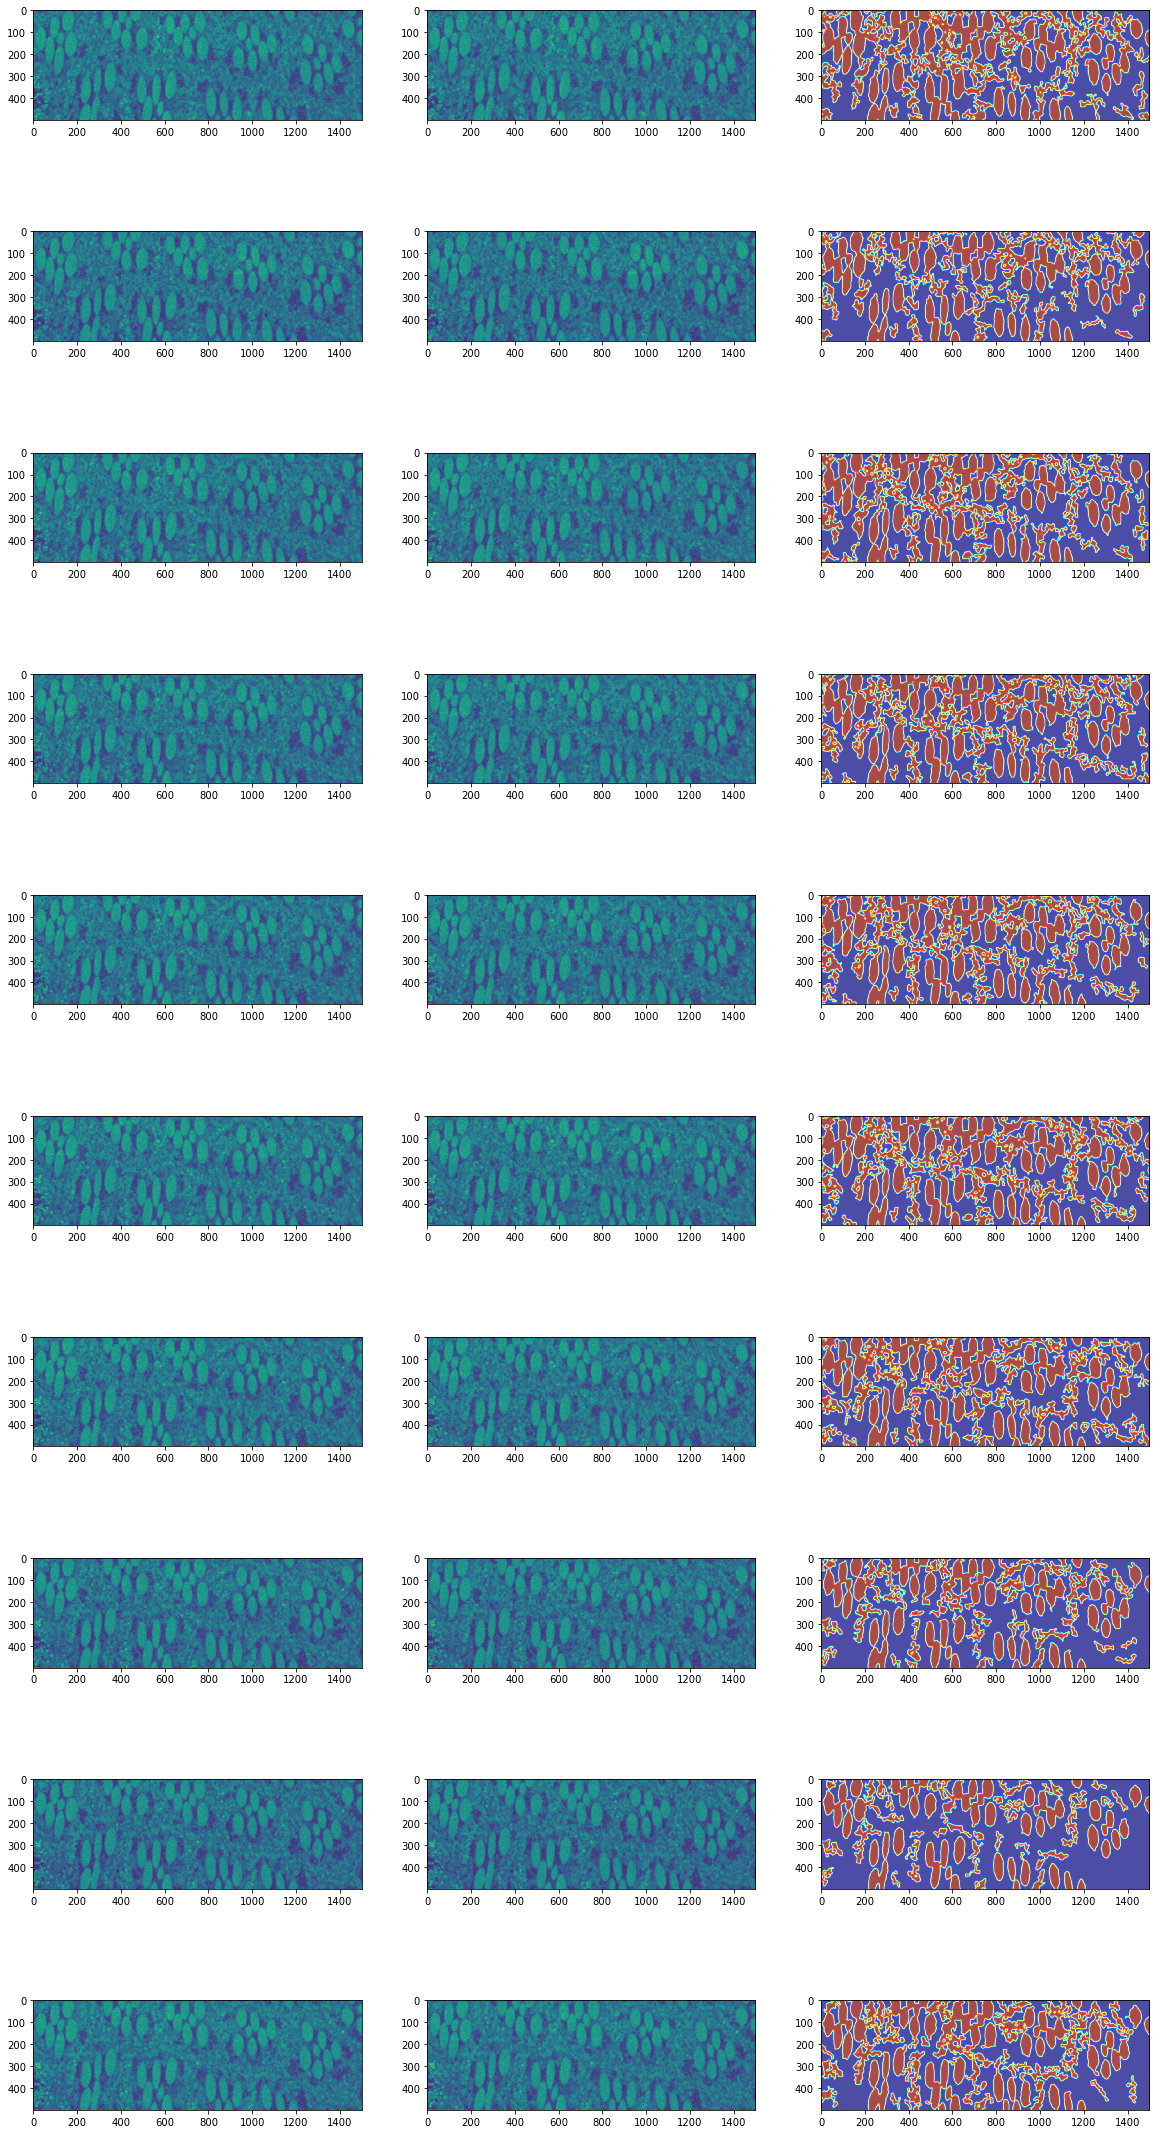

In [15]:
plt.figure()
f, axarr = plt.subplots(10, 3, figsize=(20, 40))
i = 0
for s in slices:
    # apply gaussian filter
    x = s.copy()
    y = mh.stretch_rgb(x)
    b = y.copy()
    
    b = mh.gaussian_filter(b, sigma=3)
    
    # filter by value
    b[b<100] = 0 # Could be played around with later
    
    # label regions
    labeled, number  = mh.label(b)
    
    # filter based on labeled region size
    sizes = mh.labeled.labeled_size(labeled)
    too_small = np.where(sizes < 1000)
    labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
    
    # create binary mask - foreground and background
    binary_mask = labeled_only_big.copy()
    binary_mask[binary_mask > 0] = 1
    
    # close region in binary mask
    binary_mask_closed = mh.morph.close(binary_mask)
    
    # apply gaussian filter on close region binary mask
    binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)
    
    # show images
    axarr[i,0].imshow(s)
    axarr[i,1].imshow(y)
    axarr[i,2].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
    
    i += 1

<Figure size 432x288 with 0 Axes>

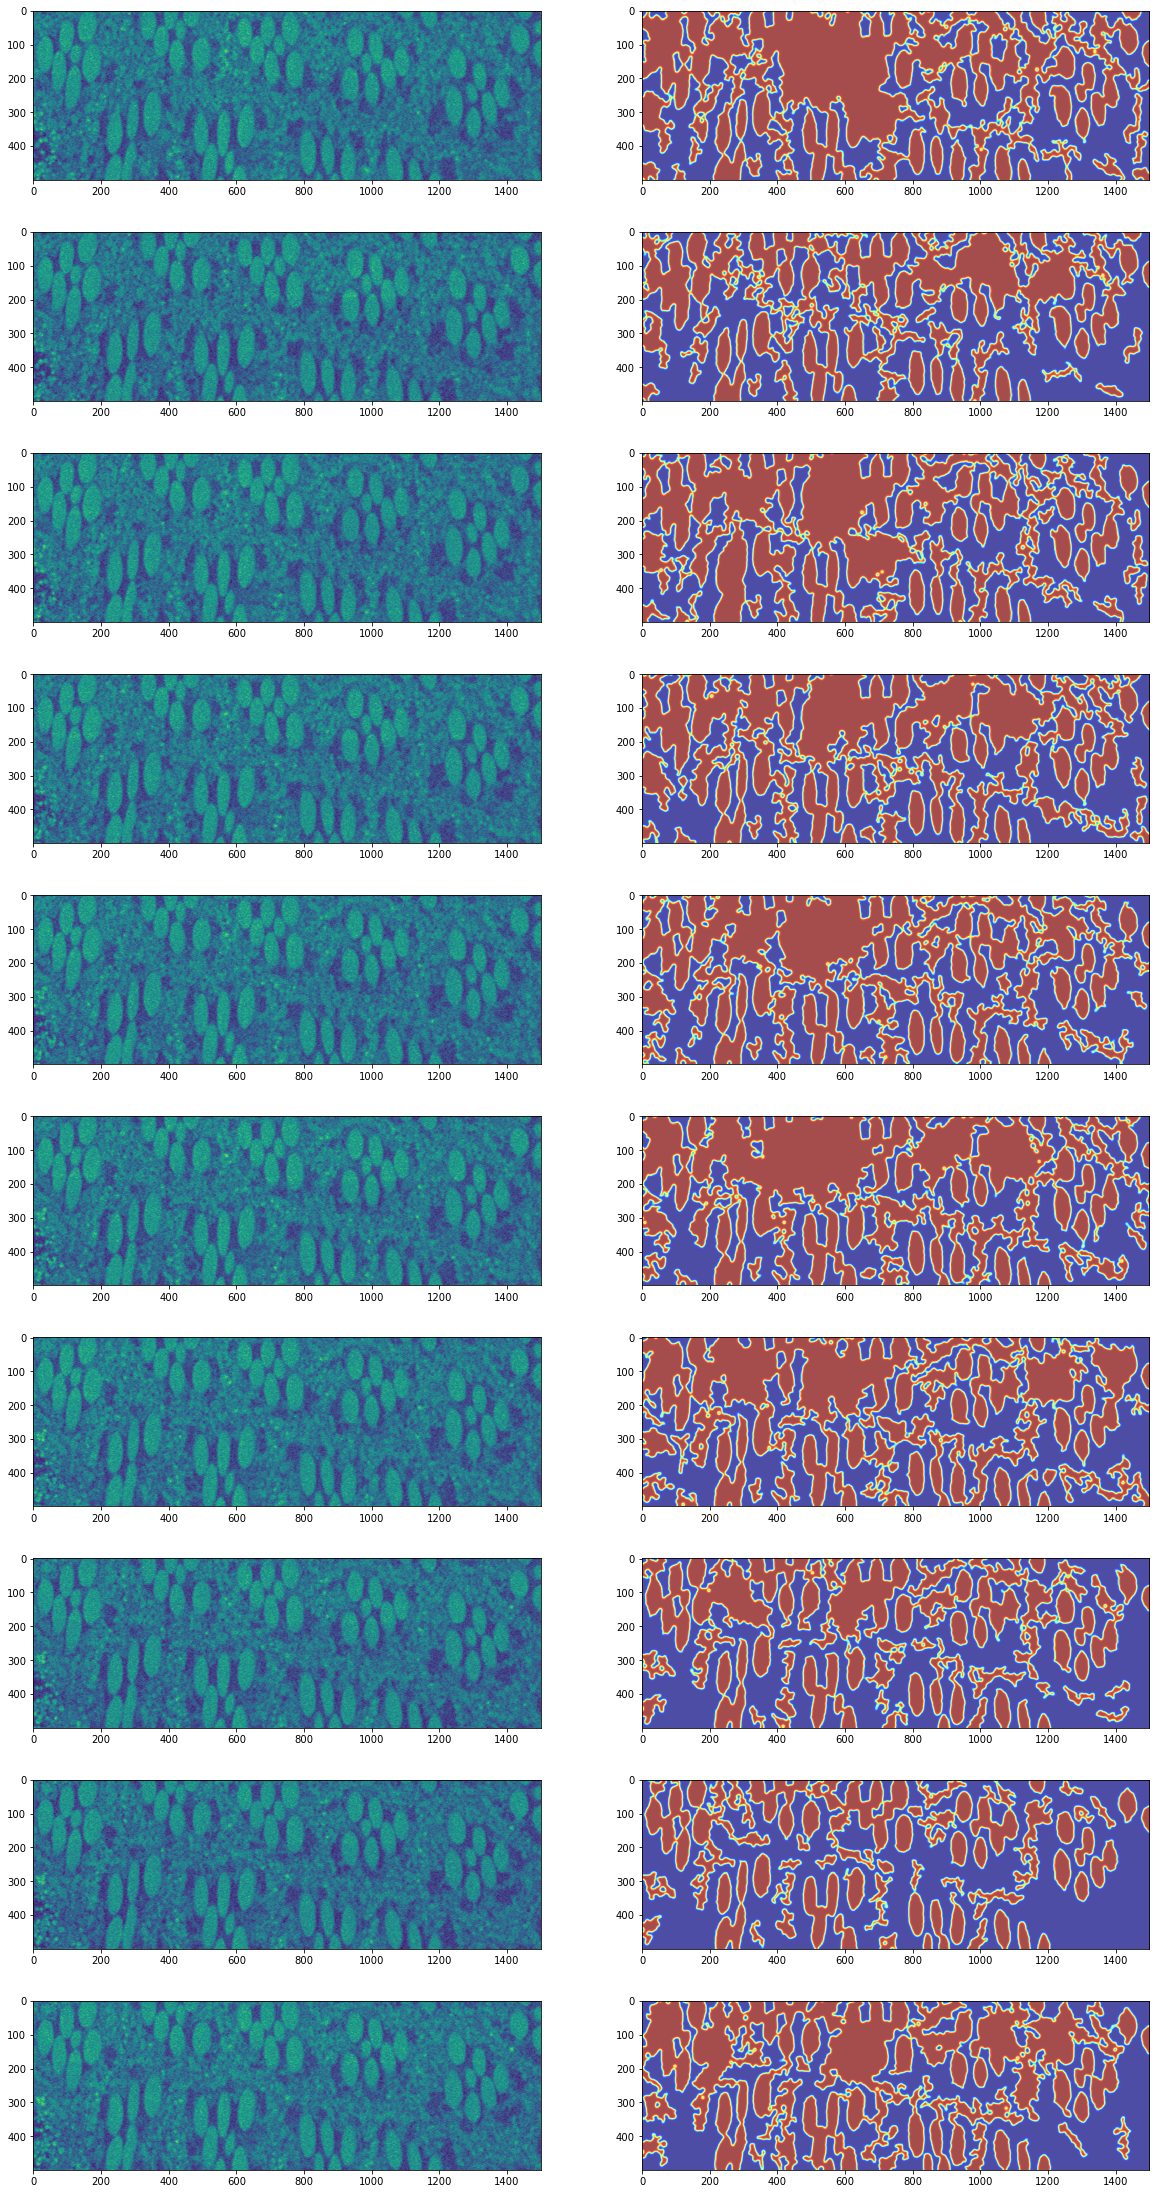

In [13]:
plt.figure()
f, plot = plt.subplots(10, 2, figsize=(20, 40))
j = 0
for s in slices:
    # apply gaussian filter
    b = s.copy()
    b = mh.gaussian_filter(b, sigma=3)
    
    # filter by value
    b[b<100] = 0 # Could be played around with later
    
    # label regions
    labeled, number  = mh.label(b)
    
    # filter based on labeled region size
    sizes = mh.labeled.labeled_size(labeled)
    too_small = np.where(sizes < 1000)
    labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
    
    # create binary mask - foreground and background
    binary_mask = labeled_only_big.copy()
    binary_mask[binary_mask > 0] = 1
    
    # close holes in binary mask
    binary_mask_closed_holes = mh.morph.close_holes(binary_mask)
    
    # close region in binary mask
    binary_mask_closed = mh.morph.close(binary_mask_closed_holes)
    
    # dilate and erode to fill further holes
    for i in range(4):
        binary_mask_closed = mh.morph.dilate(binary_mask_closed)
    for i in range(4):
        binary_mask_closed = mh.morph.erode(binary_mask_closed)
    
    # apply gaussian filter on close region binary mask
    binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)
    
    # show images
    plot[j,0].imshow(s)
    plot[j,1].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
    
    j += 1